<a href="https://colab.research.google.com/github/naqirraza99/CS-351L---AI-Lab1_2022574/blob/main/Lab%203/Lab_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Data Exploration and Preprocessing**

1. **Load the Dataset:**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic_data = pd.read_csv('train.csv')

# Display the first few rows of the dataset
print(titanic_data.head())


2. **Data Exploration:**



 *   Visualize the distribution of key Features:




In [ ]:
# Visualizing key features
sns.countplot(data=titanic_data, x='Pclass', hue='Survived')
plt.show()

sns.histplot(data=titanic_data, x='Age', hue='Survived', kde=True)
plt.show()

sns.countplot(data=titanic_data, x='Sex', hue='Survived')
plt.show()



*   Check for missing values:



In [ ]:
# Check for missing values
print(titanic_data.isnull().sum())


3. **Data Preprocessing:**

* Handle missing values:

In [ ]:
# Fill missing Age with median and drop rows with missing Embarked values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.dropna(subset=['Embarked'], inplace=True)


* Encode categorical variables:

In [ ]:
# Convert categorical variables into numeric format
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


* Standardize numerical features:

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize Age and Fare columns
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])


# **Part 2: Implementing k-NN**

1. **Model Training:**

* Split the dataset into training and testing sets:

In [ ]:
from sklearn.model_selection import train_test_split

# Define feature variables and target
X = titanic_data[['Pclass', 'Age', 'Sex', 'Fare', 'Embarked']]
y = titanic_data['Survived']

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


* Implement k-NN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create k-NN classifier and train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)


# **Titanic dataset for Supervised Learning with k-Nearest Neighbors (k-NN)**

Saving train.csv to train (1).csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


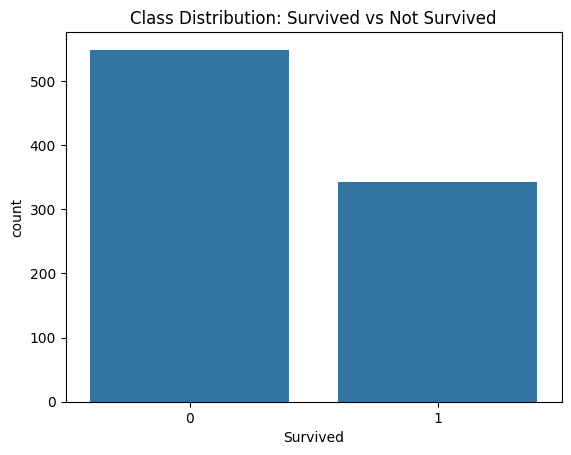

Accuracy of k-NN: 78.28%

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       167
           1       0.71      0.70      0.71       100

    accuracy                           0.78       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



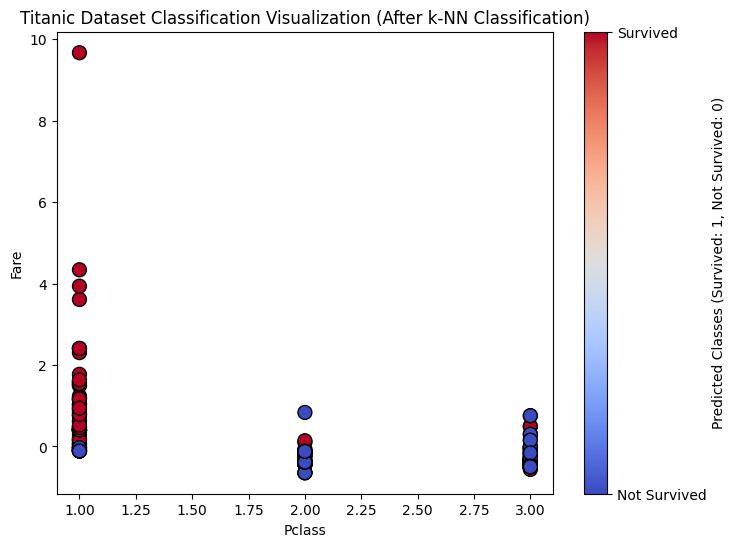

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset after upload or download
from google.colab import files
uploaded = files.upload()  # Manually upload train.csv here

titanic_data = pd.read_csv('train.csv')

# Display dataset information
print("Dataset Information:")
print(titanic_data.info())

# Visualize the class distribution (Survived column)
sns.countplot(data=titanic_data, x='Survived')
plt.title('Class Distribution: Survived vs Not Survived')
plt.show()

# Step 1: Data Preprocessing
# Fill missing Age values with median and drop rows with missing Embarked values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.dropna(subset=['Embarked'], inplace=True)

# Convert categorical variables into numeric format
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Standardize numerical features like Age and Fare
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Step 2: Define feature variables (X) and target variable (y)
X = titanic_data[['Pclass', 'Age', 'Sex', 'Fare', 'Embarked']]  # Features
y = titanic_data['Survived']  # Target (Survived or not)

# Step 3: Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Implementing k-Nearest Neighbors with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)  # Train the k-NN model on the training data

# Step 5: Making predictions on the test set
y_pred = knn.predict(X_test)

# Step 6: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Accuracy of k-NN: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Step 7: Visualizing the classification results using first two features (Pclass, Fare)
plt.figure(figsize=(8,6))
plt.scatter(X_test['Pclass'], X_test['Fare'], c=y_pred, cmap='coolwarm', edgecolor='k', s=100)
plt.title('Titanic Dataset Classification Visualization (After k-NN Classification)')
plt.xlabel('Pclass')  # Feature 1
plt.ylabel('Fare')    # Feature 2
colorbar = plt.colorbar(label='Predicted Classes (Survived: 1, Not Survived: 0)')
colorbar.set_ticks([0, 1])
colorbar.set_ticklabels(['Not Survived', 'Survived'])
plt.show()


#**Titanic dataset for Supervised Learning with Decison Trees**

Saving train.csv to train (2).csv
Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


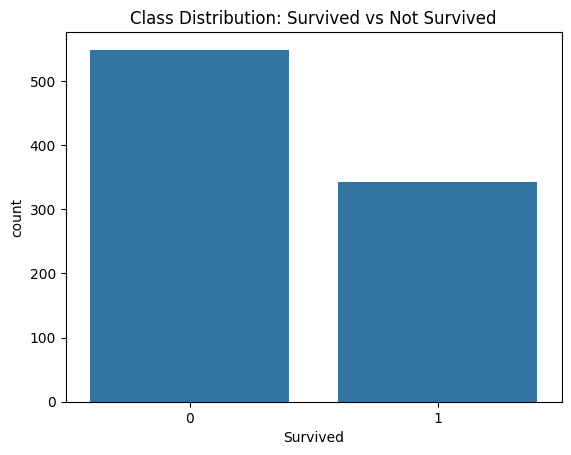

Accuracy of Decision Tree: 81.27%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86       167
           1       0.83      0.63      0.72       100

    accuracy                           0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



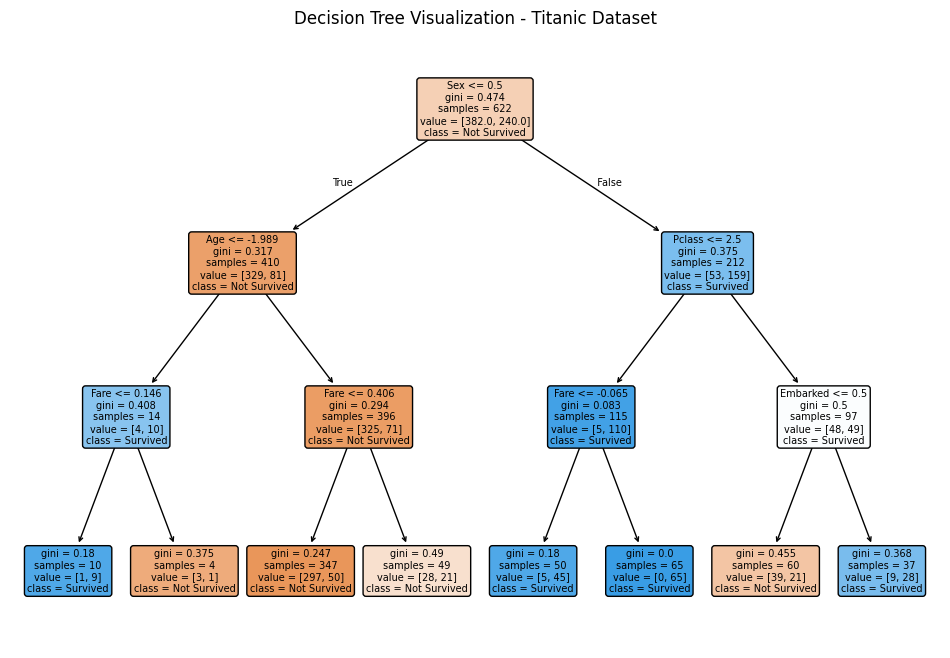

In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
from google.colab import files
uploaded = files.upload()  # Upload the Titanic dataset manually

titanic_data = pd.read_csv('train.csv')

# Display dataset information
print("Dataset Information:")
print(titanic_data.info())

# Visualize the class distribution (Survived column)
sns.countplot(data=titanic_data, x='Survived')
plt.title('Class Distribution: Survived vs Not Survived')
plt.show()

# Step 1: Data Preprocessing
# Fill missing Age values with median and drop rows with missing Embarked values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.dropna(subset=['Embarked'], inplace=True)

# Convert categorical variables into numeric format
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Standardize numerical features like Age and Fare
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
titanic_data[['Age', 'Fare']] = scaler.fit_transform(titanic_data[['Age', 'Fare']])

# Step 2: Define feature variables (X) and target variable (y)
X = titanic_data[['Pclass', 'Age', 'Sex', 'Fare', 'Embarked']]  # Features
y = titanic_data['Survived']  # Target (Survived or not)

# Step 3: Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Implementing Decision Tree Classifier
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

# Step 5: Making predictions on the test set
y_pred = decision_tree.predict(X_test)

# Step 6: Evaluate the performance of the Decision Tree
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display accuracy and classification report
print(f"Accuracy of Decision Tree: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_rep)

# Step 7: Visualizing the Decision Tree
plt.figure(figsize=(12,8))
tree.plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.title("Decision Tree Visualization - Titanic Dataset")
plt.show()


* Implement Decision Tree:


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifier and train
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)


2. **Model Evaluation:**

* Make predictions and evaluate performance for both models

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# k-NN model predictions
y_pred_knn = knn.predict(X_test)

# Decision Tree model predictions
y_pred_tree = tree.predict(X_test)

# Evaluate k-NN
print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("k-NN Precision:", precision_score(y_test, y_pred_knn))
print("k-NN Recall:", recall_score(y_test, y_pred_knn))
print("k-NN F1 Score:", f1_score(y_test, y_pred_knn))

# Evaluate Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Decision Tree Precision:", precision_score(y_test, y_pred_tree))
print("Decision Tree Recall:", recall_score(y_test, y_pred_tree))
print("Decision Tree F1 Score:", f1_score(y_test, y_pred_tree))


#**Part 3: Visualization**

1. **Decision Boundaries (for two features):**

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title):
    X_set, y_set = X[['Pclass', 'Fare']].values, y.values
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=ListedColormap(('red', 'green')))
    plt.title(title)
    plt.xlabel('Pclass')
    plt.ylabel('Fare')
    plt.show()

# Plot decision boundaries for k-NN
plot_decision_boundary(X_test, y_test, knn, 'k-NN Decision Boundary')

# Plot decision boundaries for Decision Tree
plot_decision_boundary(X_test, y_test, tree, 'Decision Tree Decision Boundary')


2. **Performance Visualization:**

In [ ]:
# Bar chart showing the performance metrics
import matplotlib.pyplot as plt
import numpy as np

models = ['k-NN', 'Decision Tree']
accuracy = [accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_tree)]
precision = [precision_score(y_test, y_pred_knn), precision_score(y_test, y_pred_tree)]
recall = [recall_score(y_test, y_pred_knn), recall_score(y_test, y_pred_tree)]
f1 = [f1_score(y_test, y_pred_knn), f1_score(y_test, y_pred_tree)]

x = np.arange(len(models))
width = 0.2

plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, precision, width, label='Precision')
plt.bar(x + width, recall, width, label='Recall')
plt.bar(x + 2 * width, f1, width, label='F1-Score')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Performance Comparison: k-NN vs Decision Tree')
plt.xticks(x, models)
plt.legend()
plt.show()
